# Introduction

Exploratory Data Analysis (EDA) is a crucial step in any data science project as it allows us to understand the structure, patterns, and quality of the data before applying any advanced modeling techniques. In this project, we perform a comprehensive EDA on multiple liquid mutual fund's related datasets to uncover trends, assess data quality, and derive meaningful financial insights.

The project is divided into three major datasets along with a time series analysis section:
- **Dataset 1:** Analysis of Liquid Mutual Funds from the Indian market.
- **Dataset 2:** General Mutual Fund performance and classification analysis.
- **Dataset 3:** Net Asset Value (NAV) time series data of different mutual fund houses.


For each dataset, we follow a structured workflow:
1. Data Loading and Inspection  
2. Data Cleaning and Preprocessing  
3. Statistical Summary  
4. Visualization and Pattern Discovery  
5. Insight Extraction and Conclusion

This structured approach ensures that the results are reliable, interpretable, and useful for financial decision-making.

# Dataset - 1

**Objective**

The objective of this dataset is to analyze Liquid Mutual Funds in India and understand their risk profile, fund behaviour and returns. Liquid funds are typically low-risk investments used for short-term parking of funds. This section focuses on filtering liquid funds from the overall mutual fund market and studying their key financial indicators.



**Key Steps Performed**

- Loaded the mutual fund dataset.
- Filtered only Liquid Mutual Funds.
- Removed irrelevant and duplicate columns.
- Analyzed risk categories and fund distribution.
- Performed visualization for better interpretation.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("mutual_funds_india.csv")
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (1088, 9)


,Unnamed: 0,AMC_name,Mutual Fund Name,category,risk_type,fund_rating,return_1yr,return_3yr,return_5yr
0,0,Quant,Quant Small Cap Fund Direct Plan Growth,Equity,Very High Risk,4.0,9.98,54.37,22.73
1,1,Canara,Canara Robeco Small Cap Fund Direct Growth,Equity,Very High Risk,5.0,20.09,44.48,NaN
2,2,PGIM,PGIM India Midcap Opportunities Fund Direct Gr...,Equity,Very High Risk,5.0,11.02,44.22,21.49
3,3,Bank,Bank of India Small Cap Fund Direct Growth,Equity,Very High Risk,5.0,13.16,44.13,NaN
4,4,Quant,Quant Tax Plan Direct Growth,Equity,Very High Risk,5.0,17.43,43.88,23.76


In [ ]:
df = df[df['Mutual Fund Name'].str.contains('Liquid', case=False, na=False)]
print("Liquid Fund Count:", df.shape[0])
display(df.head())

Liquid Fund Count: 35


,Unnamed: 0,AMC_name,Mutual Fund Name,category,risk_type,fund_rating,return_1yr,return_3yr,return_5yr
682,682,Quant,Quant Liquid Direct Plan Growth,Debt,Moderate Risk,5.0,4.38,4.92,5.90
693,693,Taurus,Taurus Liquid Fund Super Institutional Direct ...,Debt,Low Risk,1.0,3.24,4.81,4.59
736,736,IDBI,IDBI Liquid Fund Direct Growth,Debt,Moderate Risk,4.0,4.03,4.25,5.46
739,739,Mahindra,Mahindra Manulife Liquid Fund Direct Growth,Debt,Low to Moderate Risk,5.0,4.06,4.20,5.44
740,740,Edelweiss,Edelweiss Liquid Direct Growth,Debt,Low to Moderate Risk,4.0,3.99,4.19,5.43


In [ ]:
df = df.drop(columns=['category', 'Unnamed: 0'])
print("Columns after dropping 'category' and 'Unnamed: 0':", df.columns.tolist())
display(df.head())

Columns after dropping 'category' and 'Unnamed: 0': ['AMC_name', 'Mutual Fund Name', 'risk_type', 'fund_rating', 'return_1yr', 'return_3yr', 'return_5yr']


,AMC_name,Mutual Fund Name,risk_type,fund_rating,return_1yr,return_3yr,return_5yr
682,Quant,Quant Liquid Direct Plan Growth,Moderate Risk,5.0,4.38,4.92,5.90
693,Taurus,Taurus Liquid Fund Super Institutional Direct ...,Low Risk,1.0,3.24,4.81,4.59
736,IDBI,IDBI Liquid Fund Direct Growth,Moderate Risk,4.0,4.03,4.25,5.46
739,Mahindra,Mahindra Manulife Liquid Fund Direct Growth,Low to Moderate Risk,5.0,4.06,4.20,5.44
740,Edelweiss,Edelweiss Liquid Direct Growth,Low to Moderate Risk,4.0,3.99,4.19,5.43


In [ ]:
print("Original 'risk_type' value counts:")
print(df['risk_type'].value_counts())

Original 'risk_type' value counts:
risk_type
Low to Moderate Risk    26
Moderate Risk            6
Low Risk                 3
Name: count, dtype: int64


In [ ]:
risk_mapping = {
    'Low Risk': 1,
    'Low to Moderate Risk': 2,
    'Moderate Risk': 3,
    'High Risk': 4,
    'Very High Risk': 5,
    'Unknown': 0
}

In [ ]:
df['risk_type_numeric'] = df['risk_type'].map(risk_mapping)
print("\n'risk_type_numeric' value counts after conversion:")
print(df['risk_type_numeric'].value_counts())
display(df.head())


'risk_type_numeric' value counts after conversion:
risk_type_numeric
2    26
3     6
1     3
Name: count, dtype: int64


,AMC_name,Mutual Fund Name,risk_type,fund_rating,return_1yr,return_3yr,return_5yr,risk_type_numeric
682,Quant,Quant Liquid Direct Plan Growth,Moderate Risk,5.0,4.38,4.92,5.90,3
693,Taurus,Taurus Liquid Fund Super Institutional Direct ...,Low Risk,1.0,3.24,4.81,4.59,1
736,IDBI,IDBI Liquid Fund Direct Growth,Moderate Risk,4.0,4.03,4.25,5.46,3
739,Mahindra,Mahindra Manulife Liquid Fund Direct Growth,Low to Moderate Risk,5.0,4.06,4.20,5.44,2
740,Edelweiss,Edelweiss Liquid Direct Growth,Low to Moderate Risk,4.0,3.99,4.19,5.43,2


In [ ]:
df = df.drop(columns=['risk_type'])
display(df.head())

,AMC_name,Mutual Fund Name,fund_rating,return_1yr,return_3yr,return_5yr,risk_type_numeric
682,Quant,Quant Liquid Direct Plan Growth,5.0,4.38,4.92,5.90,3
693,Taurus,Taurus Liquid Fund Super Institutional Direct ...,1.0,3.24,4.81,4.59,1
736,IDBI,IDBI Liquid Fund Direct Growth,4.0,4.03,4.25,5.46,3
739,Mahindra,Mahindra Manulife Liquid Fund Direct Growth,5.0,4.06,4.20,5.44,2
740,Edelweiss,Edelweiss Liquid Direct Growth,4.0,3.99,4.19,5.43,2


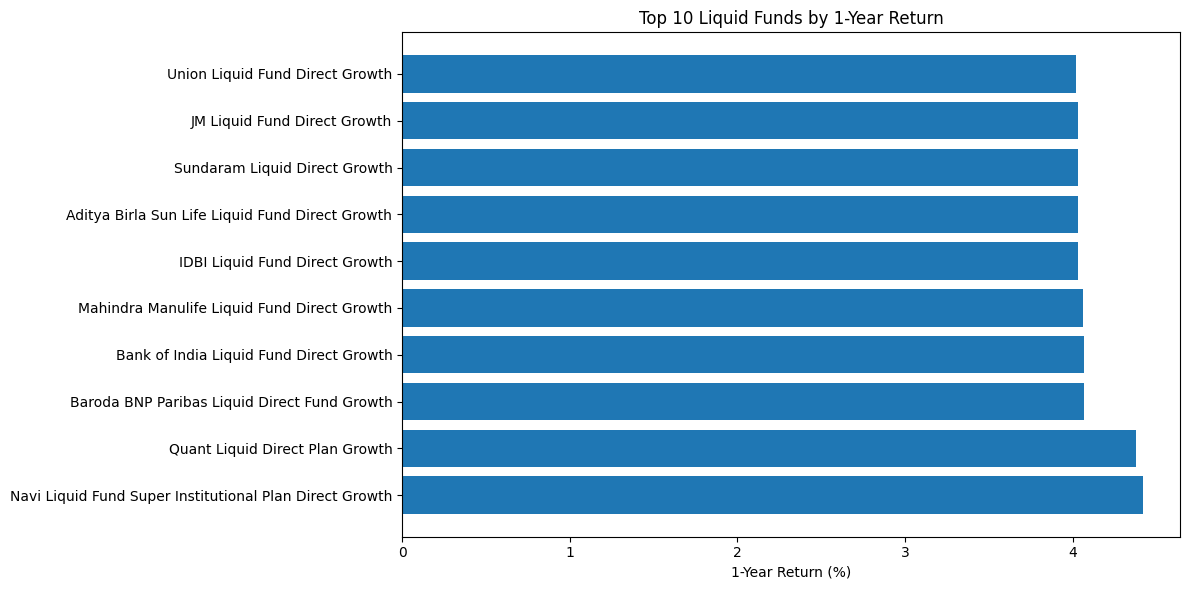

In [ ]:
top1yr = df.nlargest(10, "return_1yr")

plt.figure(figsize=(12,6))
plt.barh(top1yr["Mutual Fund Name"], top1yr["return_1yr"])
plt.xlabel("1-Year Return (%)")
plt.title("Top 10 Liquid Funds by 1-Year Return")
plt.tight_layout()
plt.show()

**Observation - Top 10 Liquid Funds by 1-Year Return (Horizontal Bar Chart)**

This graph highlights the top 10 liquid mutual funds based on their 1-year return. A noticeable variation in returns is observed among the top funds, indicating that even within the same fund category, performance differs significantly. A few funds clearly outperform others, making them strong short-term investment choices.

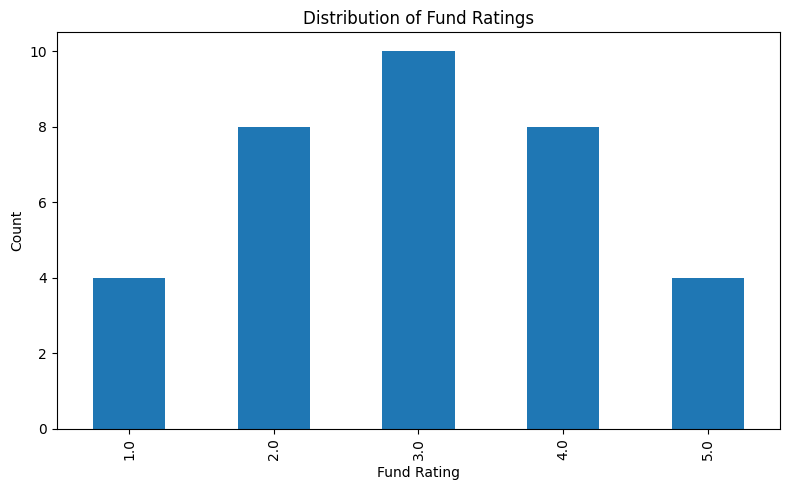

In [ ]:
plt.figure(figsize=(8,5))
df["fund_rating"].value_counts().sort_index().plot(kind="bar")
plt.xlabel("Fund Rating")
plt.ylabel("Count")
plt.title("Distribution of Fund Ratings")
plt.tight_layout()
plt.show()

**Distribution of Fund Ratings (Bar Chart)**

Most liquid funds fall under the 3-star rating categorie, showing that the majority of funds provide average performance. Very few funds have extremely low ratings, which suggests overall stability and reliability within the liquid fund segment.

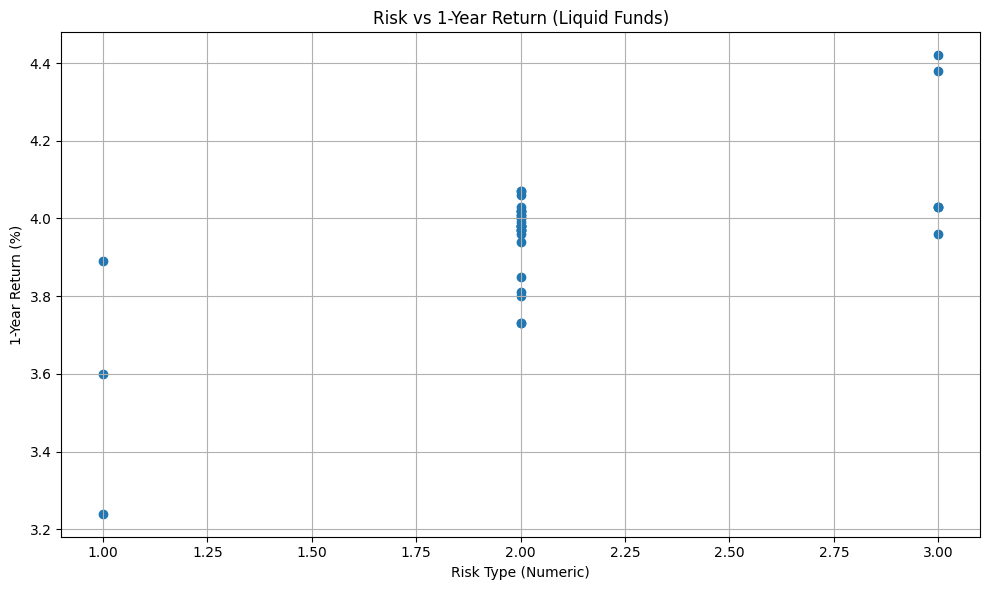

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df["risk_type_numeric"], df["return_1yr"])
plt.xlabel("Risk Type (Numeric)")
plt.ylabel("1-Year Return (%)")
plt.title("Risk vs 1-Year Return (Liquid Funds)")
plt.grid(True)
plt.tight_layout()
plt.show()

**Observation : Risk vs 1-Year Return (Scatter Plot)**

The scatter plot shows a positive relationship between risk and return, where moderate-risk funds generally provide higher returns than low-risk funds. However, the spread also indicates that higher risk does not always guarantee higher return, emphasizing the importance of careful fund selection.

<Figure size 1400x600 with 0 Axes>

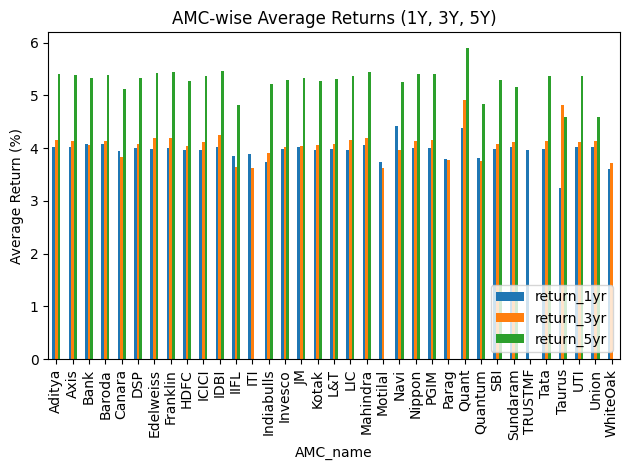

In [ ]:
amc_returns = df.groupby("AMC_name")[["return_1yr","return_3yr","return_5yr"]].mean()
plt.figure(figsize=(14,6))
amc_returns.plot(kind="bar")
plt.ylabel("Average Return (%)")
plt.title("AMC-wise Average Returns (1Y, 3Y, 5Y)")
plt.legend(loc='lower right') # Moved legend to bottom right
plt.tight_layout()
plt.show()

**Observation : AMC-wise Average Returns (Bar Chart)**

This graph compares different Asset Management Companies (AMCs) based on their average returns. Some AMCs consistently outperform others, showing that AMC reputation and management strategy play a key role in fund performance.

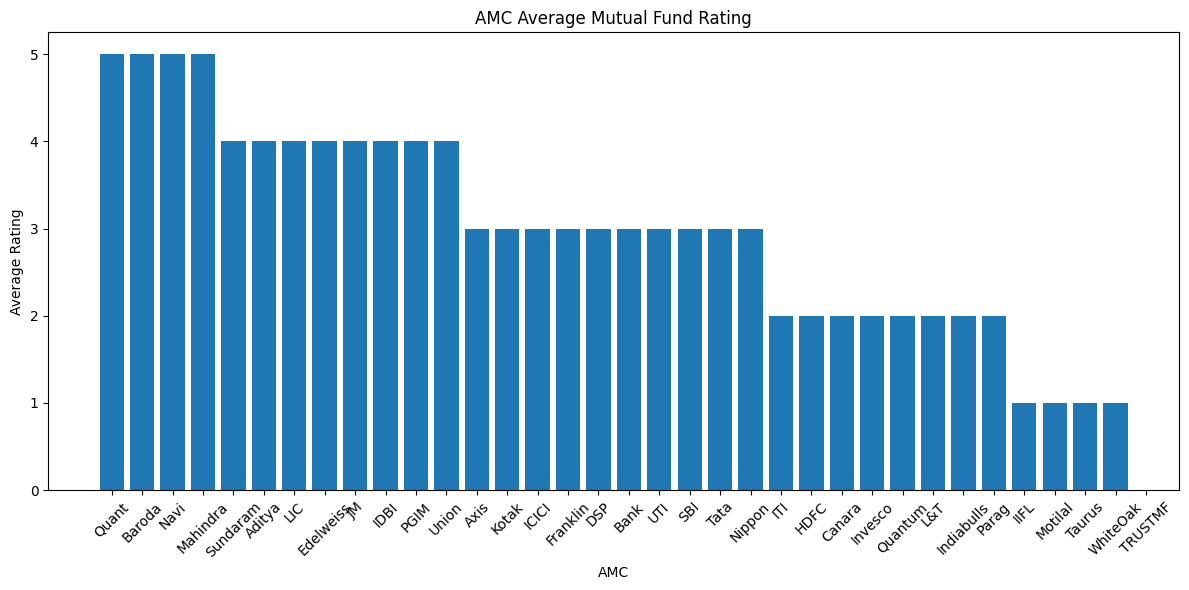

In [ ]:
rating_amc = df.groupby("AMC_name")["fund_rating"].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
plt.bar(rating_amc.index, rating_amc.values)
plt.xlabel("AMC")
plt.ylabel("Average Rating")
plt.title("AMC Average Mutual Fund Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Observation : AMC-wise Average Fund Rating (Bar Chart)**

The average fund ratings across AMCs show that only a few AMCs maintain consistently high ratings. This suggests that fund quality varies significantly between companies and that investors should evaluate AMC performance before investing.

**Conclusion – Dataset 1**

From this dataset, we successfully isolated Liquid Mutual Funds and explored their key financial and risk characteristics. The analysis showed how risk types are distributed among liquid funds and provided insights on its fund rating given by the people. This EDA helps investors understand the stability and consistency of low-risk mutual fund instruments.


# Dataset - 2

**Objective**

This dataset focuses on the overall performance of mutual funds across multiple categories. The goal is to understand how different types of funds behave in terms of AUM and investment size.


**Key Steps Performed**
- Imported the mutual fund performance dataset.
- Checked for missing values and outliers.
- Conducted statistical summaries.
- Created multiple visualizations to compare returns and volatility.
- Studied the relationship between fund type, risk, and performance.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
df2 = pd.read_csv("mutual_fund_data.csv")
print("Dataset Shape:", df2.shape)
df2.head()

Dataset Shape: (16129, 16)


,Scheme_Code,Scheme_Name,AMC,Scheme_Type,Scheme_Category,Scheme_NAV_Name,Scheme_Min_Amt,NAV,Latest_NAV_Date,Average_AUM_Cr,AAUM_Quarter,ISIN_Div_Payout/Growth,ISIN_Div_Reinvestment,ISIN_Div_Payout/Growth/Div_Reinvestment,Launch_Date,Closure_Date
0,100033,Aditya Birla Sun Life Large & Mid Cap Fund,Aditya Birla Sun Life AMC Limited,Open Ended,Equity Scheme - Large & Mid Cap Fund,Aditya Birla Sun Life Large & Mid Cap Fund - R...,5000,918.4700,2025-11-13,4513.2401,July - September 2025,INF209K01165,-,INF209K01165,1995-02-24,1995-02-24
1,100034,Aditya Birla Sun Life Large & Mid Cap Fund,Aditya Birla Sun Life AMC Limited,Open Ended,Equity Scheme - Large & Mid Cap Fund,Aditya Birla Sun Life Large & Mid Cap Fund -Re...,5000,142.4500,2025-11-13,499.3067,July - September 2025,INF209K01157,INF209K01CE5,INF209K01157INF209K01CE5,1995-02-24,1995-02-24
2,100037,Aditya Birla Sun Life Income Fund,Aditya Birla Sun Life AMC Limited,Open Ended,Debt Scheme - Medium to Long Duration Fund,Aditya Birla Sun Life Income Fund - Regular - ...,5000,13.2554,2025-11-13,11.7044,July - September 2025,INF209K01587,INF209K01CY3,INF209K01587INF209K01CY3,1994-01-01,1994-01-01
3,100038,Aditya Birla Sun Life Income Fund,Aditya Birla Sun Life AMC Limited,Open Ended,Debt Scheme - Medium to Long Duration Fund,Aditya Birla Sun Life Income Fund - Growth - R...,5000,126.5845,2025-11-13,836.9330,July - September 2025,INF209K01579,-,INF209K01579,1994-01-01,1994-01-01
4,100039,Aditya Birla Sun Life Income Fund,Aditya Birla Sun Life AMC Limited,Open Ended,Debt Scheme - Medium to Long Duration Fund,Birla Income Plus-Institutional (Growth),5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1994-01-01,1994-01-01


In [ ]:
df2 = df2[df2['Scheme_Category'].str.contains('Liquid', case=False, na=False)]
print("Liquid Fund Count:", df2.shape[0])
df2.head()

Liquid Fund Count: 542


,Scheme_Code,Scheme_Name,AMC,Scheme_Type,Scheme_Category,Scheme_NAV_Name,Scheme_Min_Amt,NAV,Latest_NAV_Date,Average_AUM_Cr,AAUM_Quarter,ISIN_Div_Payout/Growth,ISIN_Div_Reinvestment,ISIN_Div_Payout/Growth/Div_Reinvestment,Launch_Date,Closure_Date
6,100041,Aditya Birla Sun Life Liquid Fund,Aditya Birla Sun Life AMC Limited,Open Ended,Debt Scheme - Liquid Fund,Aditya Birla Sun Life Liquid Fund -Institution...,5000,108.0230,2025-11-13,0.2131,July - September 2025,-,INF209K01KN9,INF209K01KN9,1997-06-04,1997-06-07
7,100042,Aditya Birla Sun Life Liquid Fund,Aditya Birla Sun Life AMC Limited,Open Ended,Debt Scheme - Liquid Fund,Aditya Birla Sun Life Liquid Fund-Retail (Growth),5000,697.3586,2025-11-13,19.8220,July - September 2025,INF209K01ME4,-,INF209K01ME4,1997-06-04,1997-06-07
8,100043,Aditya Birla Sun Life Liquid Fund,Aditya Birla Sun Life AMC Limited,Open Ended,Debt Scheme - Liquid Fund,Aditya Birla Sun Life Liquid Fund-Institutiona...,5000,715.6342,2025-11-13,1.6592,July - September 2025,INF209K01RT1,-,INF209K01RT1,1997-06-04,1997-06-07
9,100044,Aditya Birla Sun Life Liquid Fund,Aditya Birla Sun Life AMC Limited,Open Ended,Debt Scheme - Liquid Fund,Aditya Birla Sun Life Liquid Fund -Retail - IDCW,5000,163.6940,2025-11-13,0.5740,July - September 2025,-,INF209K01KP4,INF209K01KP4,1997-06-04,1997-06-07
10,100046,Aditya Birla Sun Life Liquid Fund,Aditya Birla Sun Life AMC Limited,Open Ended,Debt Scheme - Liquid Fund,Aditya Birla Sun Life Liquid Fund -Daily IDCW,5000,100.1950,2025-11-13,89.9765,July - September 2025,INF209K01KQ2,INF209K01SQ5,INF209K01KQ2INF209K01SQ5,1997-06-04,1997-06-07


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 542 entries, 6 to 16024
Data columns (total 16 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Scheme_Code                              542 non-null    int64  
 1   Scheme_Name                              542 non-null    object 
 2   AMC                                      542 non-null    object 
 3   Scheme_Type                              542 non-null    object 
 4   Scheme_Category                          542 non-null    object 
 5   Scheme_NAV_Name                          542 non-null    object 
 6   Scheme_Min_Amt                           542 non-null    object 
 7   NAV                                      478 non-null    float64
 8   Latest_NAV_Date                          478 non-null    object 
 9   Average_AUM_Cr                           370 non-null    float64
 10  AAUM_Quarter                             370 non-null

In [ ]:
df2.describe()

,Scheme_Code,NAV,Average_AUM_Cr
count,542.000000,478.000000,370.000000
mean,124784.184502,1141.626707,1532.576186
std,18286.651176,1164.406316,6221.677829
min,100041.000000,0.000000,0.000100
25%,105276.250000,122.120350,0.136450
50%,120193.500000,1003.387850,1.231900
75%,140513.750000,1230.285675,46.787025
max,153890.000000,6594.297800,56932.842100


In [ ]:
def extract_plan(scheme_nav_name):
    if re.search(r'\bregular\b|\bretail\b', scheme_nav_name, re.IGNORECASE):
        return "Regular"
    elif re.search(r'\bdirect\b', scheme_nav_name, re.IGNORECASE):
        return "Direct"
    elif re.search(r'\binstitutional\b', scheme_nav_name, re.IGNORECASE):
        return "Institutional"
    else:
        return "Unknown"

In [ ]:
def extract_option(scheme_nav_name):
    if re.search(r'growth', scheme_nav_name, re.IGNORECASE):
        return "Growth"
    elif re.search(r'idcw', scheme_nav_name, re.IGNORECASE):
        return "IDCW"
    elif re.search(r'dividend', scheme_nav_name, re.IGNORECASE):
        return "Dividend"
    else:
        return "Unknown"

In [ ]:
df2['Plan_Type'] = df2['Scheme_NAV_Name'].apply(extract_plan)
df2['Option_Type'] = df2['Scheme_NAV_Name'].apply(extract_option)
display(df2.head())

,Scheme_Code,Scheme_Name,AMC,Scheme_Type,Scheme_Category,Scheme_NAV_Name,Scheme_Min_Amt,NAV,Latest_NAV_Date,Average_AUM_Cr,AAUM_Quarter,ISIN_Div_Payout/Growth,ISIN_Div_Reinvestment,ISIN_Div_Payout/Growth/Div_Reinvestment,Launch_Date,Closure_Date,Plan_Type,Option_Type
6,100041,Aditya Birla Sun Life Liquid Fund,Aditya Birla Sun Life AMC Limited,Open Ended,Debt Scheme - Liquid Fund,Aditya Birla Sun Life Liquid Fund -Institution...,5000,108.0230,2025-11-13,0.2131,July - September 2025,-,INF209K01KN9,INF209K01KN9,1997-06-04,1997-06-07,Institutional,IDCW
7,100042,Aditya Birla Sun Life Liquid Fund,Aditya Birla Sun Life AMC Limited,Open Ended,Debt Scheme - Liquid Fund,Aditya Birla Sun Life Liquid Fund-Retail (Growth),5000,697.3586,2025-11-13,19.8220,July - September 2025,INF209K01ME4,-,INF209K01ME4,1997-06-04,1997-06-07,Regular,Growth
8,100043,Aditya Birla Sun Life Liquid Fund,Aditya Birla Sun Life AMC Limited,Open Ended,Debt Scheme - Liquid Fund,Aditya Birla Sun Life Liquid Fund-Institutiona...,5000,715.6342,2025-11-13,1.6592,July - September 2025,INF209K01RT1,-,INF209K01RT1,1997-06-04,1997-06-07,Institutional,Growth
9,100044,Aditya Birla Sun Life Liquid Fund,Aditya Birla Sun Life AMC Limited,Open Ended,Debt Scheme - Liquid Fund,Aditya Birla Sun Life Liquid Fund -Retail - IDCW,5000,163.6940,2025-11-13,0.5740,July - September 2025,-,INF209K01KP4,INF209K01KP4,1997-06-04,1997-06-07,Regular,IDCW
10,100046,Aditya Birla Sun Life Liquid Fund,Aditya Birla Sun Life AMC Limited,Open Ended,Debt Scheme - Liquid Fund,Aditya Birla Sun Life Liquid Fund -Daily IDCW,5000,100.1950,2025-11-13,89.9765,July - September 2025,INF209K01KQ2,INF209K01SQ5,INF209K01KQ2INF209K01SQ5,1997-06-04,1997-06-07,Unknown,IDCW


In [ ]:
drop_cols = [
    'Scheme_Type',
    'AAUM_Quarter',
    'ISIN_Div_Payout/Growth',
    'ISIN_Div_Reinvestment',
    'ISIN_Div_Payout/Growth/Div_Reinvestment',
    'Closure_Date',
    'Scheme_Category',
    'Scheme_NAV_Name'
]

df2 = df2.drop(columns=drop_cols)

In [ ]:
print("Total NaN values per column:")
print(df2.isnull().sum())

Total NaN values per column:
Scheme_Code          0
Scheme_Name          0
AMC                  0
Scheme_Min_Amt       0
NAV                 64
Latest_NAV_Date     64
Average_AUM_Cr     172
Launch_Date          0
Plan_Type            0
Option_Type          0
dtype: int64


In [ ]:
df2 = df2.dropna(subset=['Average_AUM_Cr'])
df2.isnull().sum()

,0
Scheme_Code,0
Scheme_Name,0
AMC,0
Scheme_Min_Amt,0
NAV,0
Latest_NAV_Date,0
Average_AUM_Cr,0
Launch_Date,0
Plan_Type,0
Option_Type,0


In [ ]:
df2.shape

(370, 10)

In [ ]:
df2

,Scheme_Code,Scheme_Name,AMC,Scheme_Min_Amt,NAV,Latest_NAV_Date,Average_AUM_Cr,Launch_Date,Plan_Type,Option_Type
6,100041,Aditya Birla Sun Life Liquid Fund,Aditya Birla Sun Life AMC Limited,5000,108.0230,2025-11-13,0.2131,1997-06-04,Institutional,IDCW
7,100042,Aditya Birla Sun Life Liquid Fund,Aditya Birla Sun Life AMC Limited,5000,697.3586,2025-11-13,19.8220,1997-06-04,Regular,Growth
8,100043,Aditya Birla Sun Life Liquid Fund,Aditya Birla Sun Life AMC Limited,5000,715.6342,2025-11-13,1.6592,1997-06-04,Institutional,Growth
9,100044,Aditya Birla Sun Life Liquid Fund,Aditya Birla Sun Life AMC Limited,5000,163.6940,2025-11-13,0.5740,1997-06-04,Regular,IDCW
10,100046,Aditya Birla Sun Life Liquid Fund,Aditya Birla Sun Life AMC Limited,5000,100.1950,2025-11-13,89.9765,1997-06-04,Unknown,IDCW
...,...,...,...,...,...,...,...,...,...,...
15731,153570,UNIFI LIQUID FUND,Unifi Asset Management Private Limited,5000/-,1025.5646,2025-11-13,269.7217,2025-06-04,Direct,Growth
15732,153571,UNIFI LIQUID FUND,Unifi Asset Management Private Limited,5000/-,1025.3014,2025-11-13,5.8205,2025-06-04,Regular,Growth
15745,153585,Kotak Liquid Fund,Kotak Mahindra Asset Management Company Limited.,5000,1001.5270,2025-07-10,48.9463,2000-10-04,Direct,Unknown
15841,153688,Tata Liquid Fund,Tata Asset Management Limited,5000,1018.3831,2025-11-13,0.3094,2013-01-01,Regular,IDCW


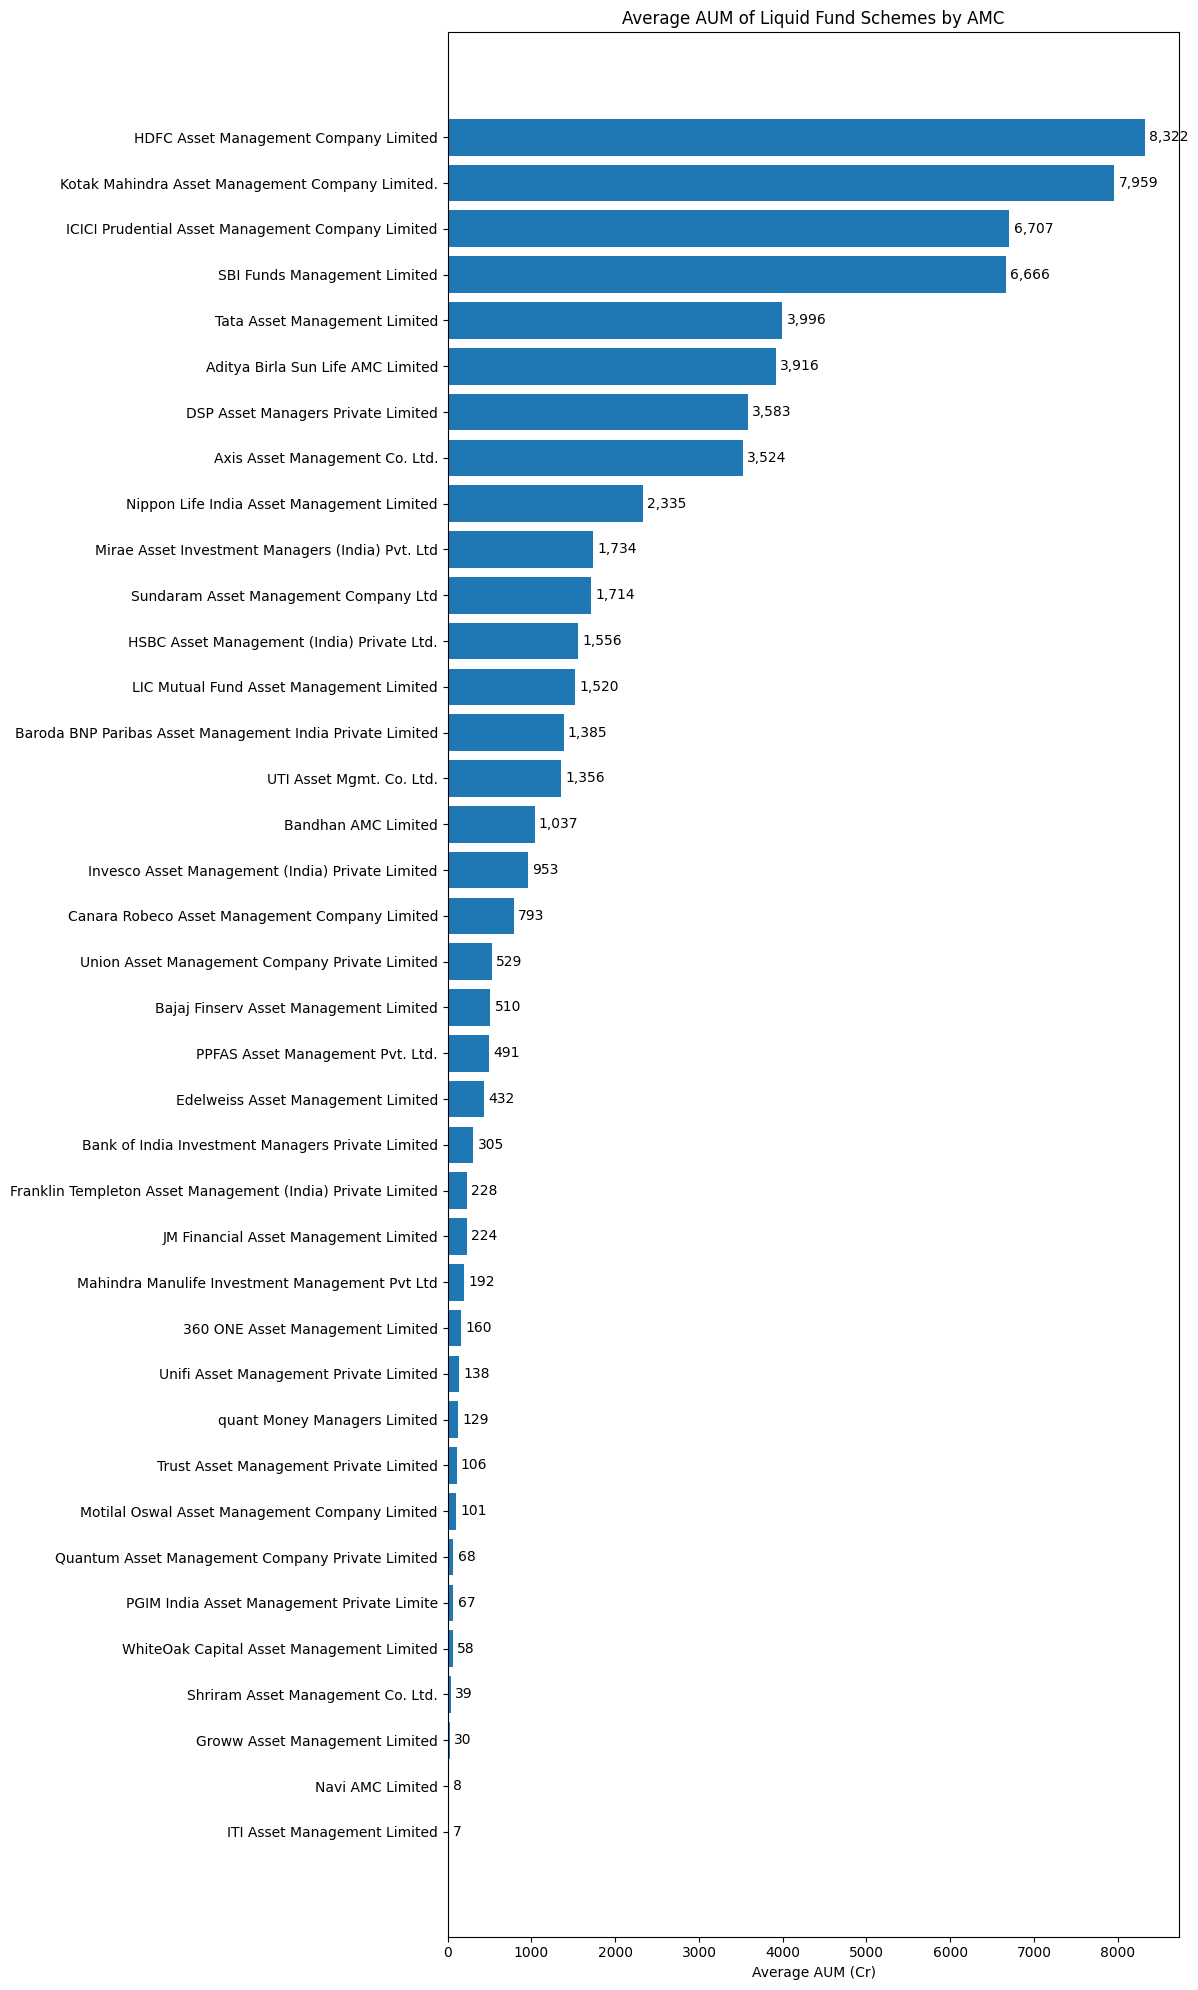

In [ ]:
amc_aum = (
    df2.groupby("AMC")["Average_AUM_Cr"]
       .mean()
       .sort_values()
)

plt.figure(figsize=(12, 20))
bars = plt.barh(amc_aum.index, amc_aum.values)
plt.xlabel("Average AUM (Cr)")
plt.title("Average AUM of Liquid Fund Schemes by AMC")

for bar in bars:
    width = bar.get_width()
    plt.text(width + 50,
             bar.get_y() + bar.get_height()/2,
             f"{width:,.0f}",
             va='center')

plt.tight_layout()
plt.show()

**Observation : AMC-wise Average AUM (Bar Chart)**

This graph shows that a few AMCs manage a very large portion of total assets, while most AMCs operate with moderate or low AUM. This reflects market concentration, where investor trust is heavily focused on a few large fund houses.

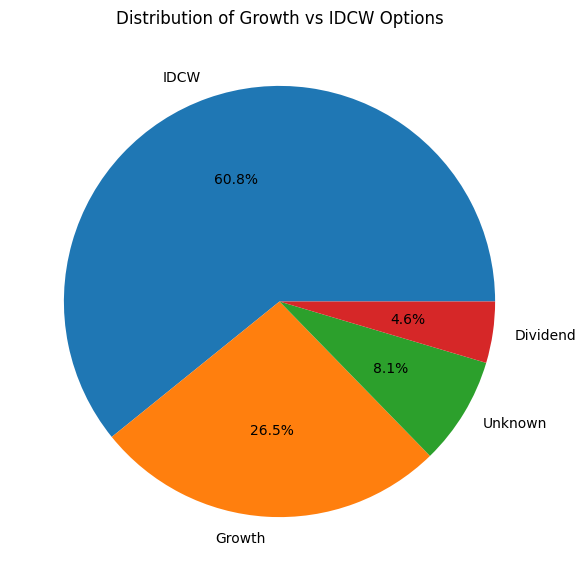

In [ ]:
option_counts = df2["Option_Type"].value_counts()

plt.figure(figsize=(7,7))
plt.pie(option_counts, labels=option_counts.index, autopct="%1.1f%%")
plt.title("Distribution of Growth vs IDCW Options")
plt.show()

**Observation : Distribution of Growth vs IDCW Options (Pie Chart)**

The majority of investors prefer the Growth option over the IDCW option, indicating that most investors focus on long-term wealth creation rather than regular income payouts. This reflects a growth-oriented investment mindset.

**Conclusion – Dataset 2**

This dataset provided a broader view of the mutual fund market. The EDA revealed clear differences in performance across different categories of funds. By analyzing returns, risk, and fund size together, we gained valuable insights into how diversification and category selection influence investment outcomes.


# Dataset - 3

**Objective**

This dataset analyzes the Net Asset Value (NAV) of multiple mutual fund houses over time using Excel files. The purpose is to study long-term trends, fluctuations, and comparative performance between different fund providers.




**Key Steps Performed**
- Loaded multiple Excel files containing NAV data.
- Cleaned and formatted date columns.
- Removed missing values.
- Combined data from different mutual fund houses.
- Plotted NAV time series for each mutual fund.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [ ]:
def clean_nav_excel(path):
    df3 = pd.read_excel(path)
    df3 = df3.iloc[4:].reset_index(drop=True)
    df3.columns = ["NAV", "Repurchase_Price", "Sale_Price", "Date"]
    df3 = df3[["NAV", "Date"]]
    df3["NAV"] = pd.to_numeric(df3["NAV"], errors="coerce")
    df3["Date"] = pd.to_datetime(df3["Date"], format="%d-%b-%Y", errors="coerce")
    df3 = df3.dropna()
    return df3

In [ ]:
mutual_funds = [
    "Aditya_Birla",
    "Axis",
    "HDFC",
    "ICICI",
    "Invesco",
    "Kotak",
    "LIC",
    "Mirae",
    "Nippon",
    "SBI"
]

In [ ]:
combined_data = {}

for fund in mutual_funds:
    print(f"Processing {fund}...")

    file_pattern = f"{fund}_*.xlsx"
    files = sorted(glob.glob(file_pattern))

    cleaned_list = []

    for f in files:
        cleaned_list.append(clean_nav_excel(f))

    merged_df = pd.concat(cleaned_list, ignore_index=True)

    merged_df = merged_df.sort_values("Date").reset_index(drop=True)

    output_path = f"{fund}_final.csv"
    merged_df.to_csv(output_path, index=False)

    combined_data[fund] = merged_df

    print(f"{fund} merged successfully → {output_path}")

print("\n All mutual funds processed successfully!")

Processing Aditya_Birla...
Aditya_Birla merged successfully → Aditya_Birla_final.csv
Processing Axis...
Axis merged successfully → Axis_final.csv
Processing HDFC...
HDFC merged successfully → HDFC_final.csv
Processing ICICI...
ICICI merged successfully → ICICI_final.csv
Processing Invesco...
Invesco merged successfully → Invesco_final.csv
Processing Kotak...
Kotak merged successfully → Kotak_final.csv
Processing LIC...
LIC merged successfully → LIC_final.csv
Processing Mirae...
Mirae merged successfully → Mirae_final.csv
Processing Nippon...
Nippon merged successfully → Nippon_final.csv
Processing SBI...
SBI merged successfully → SBI_final.csv

 All mutual funds processed successfully!


In [ ]:
def plot_nav(df3, fund_name):
    plt.figure(figsize=(12,5))
    plt.plot(df3["Date"], df3["NAV"], linewidth=2)
    plt.title(f"{fund_name} - NAV Over Time", fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("NAV", fontsize=12)
    plt.tight_layout()
    plt.show()

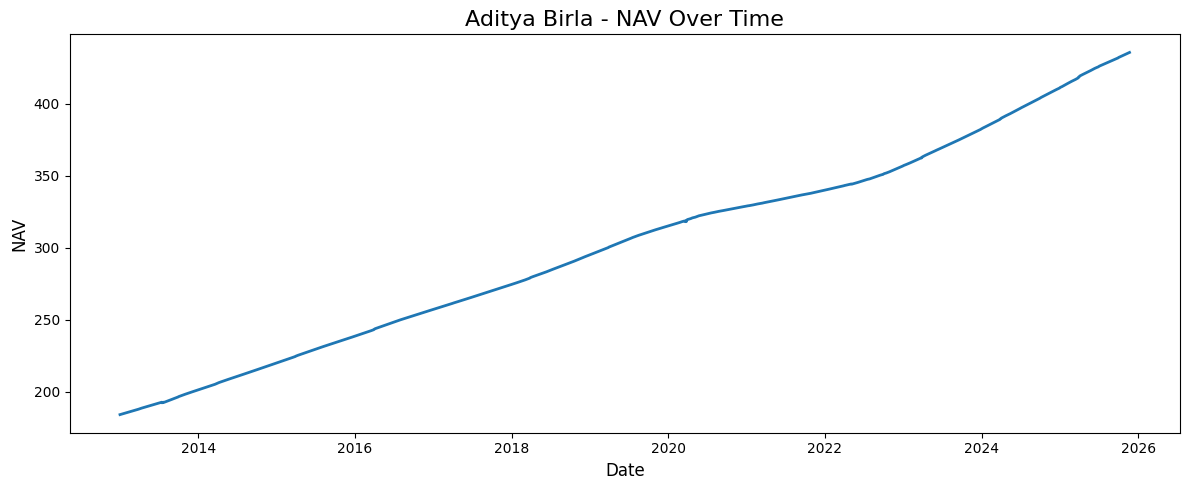

In [ ]:
plot_nav(combined_data["Aditya_Birla"], "Aditya Birla")

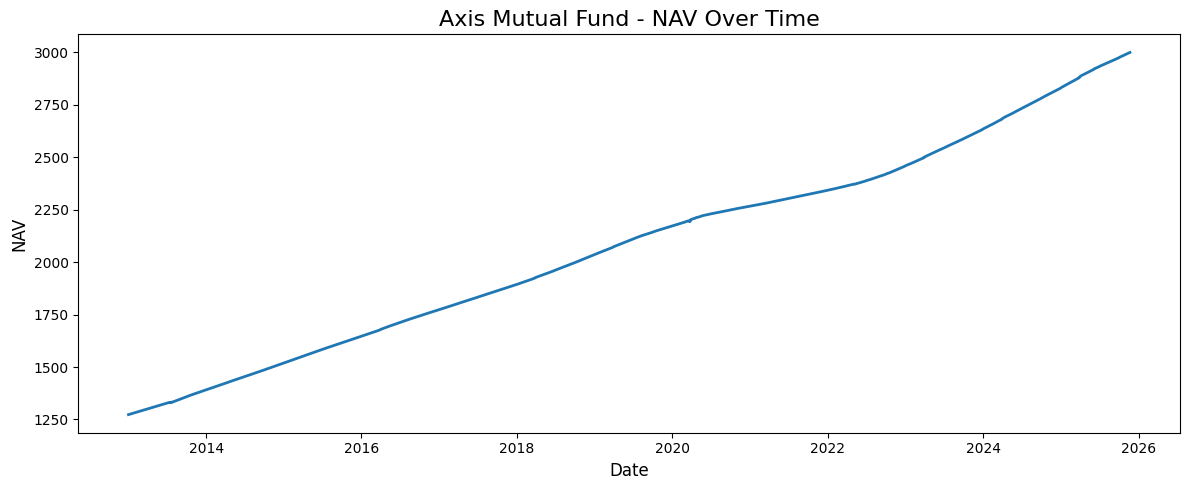

In [ ]:
plot_nav(combined_data["Axis"], "Axis Mutual Fund")

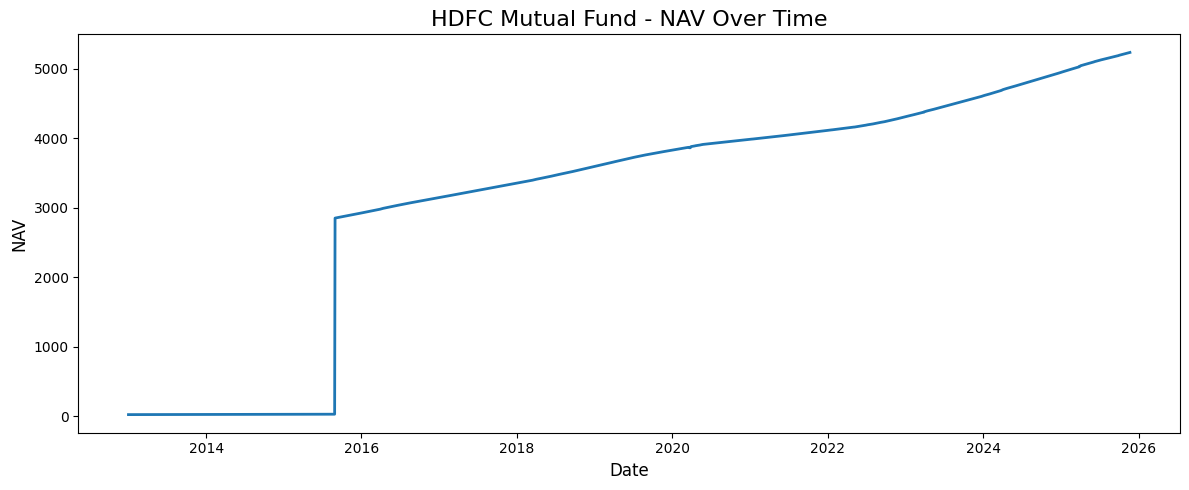

In [ ]:
plot_nav(combined_data["HDFC"], "HDFC Mutual Fund")

In [ ]:
def fix_corrupted_nav(df3):
    df3['NAV'] = df3['NAV'].apply(lambda x: x*100 if x < 100 else x)
    return df

In [ ]:
df_hdfc = combined_data["HDFC"]
df_hdfc = fix_corrupted_nav(df_hdfc)
df_hdfc.to_csv("HDFC_final.csv", index=False)

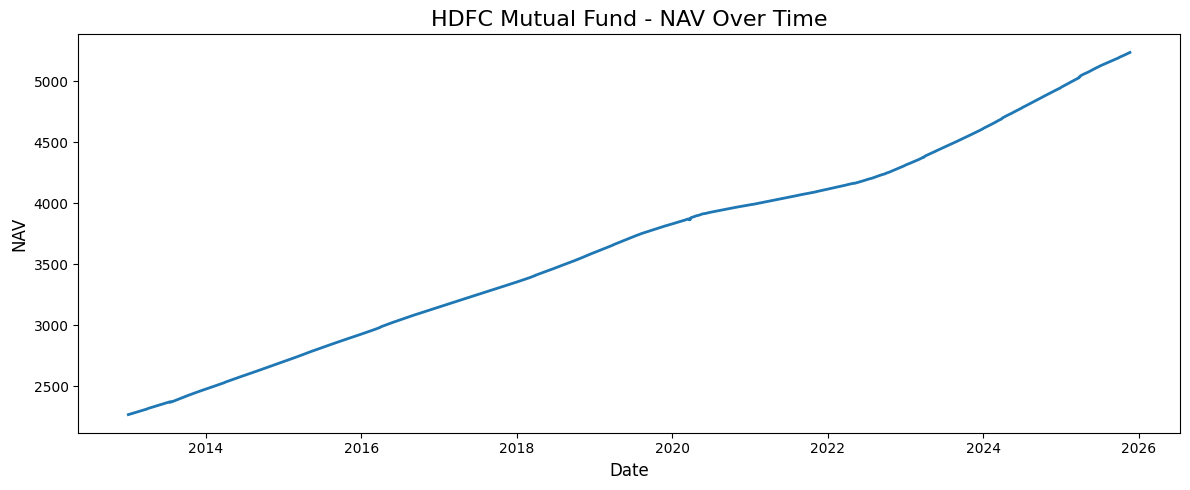

In [ ]:
plot_nav(combined_data["HDFC"], "HDFC Mutual Fund")

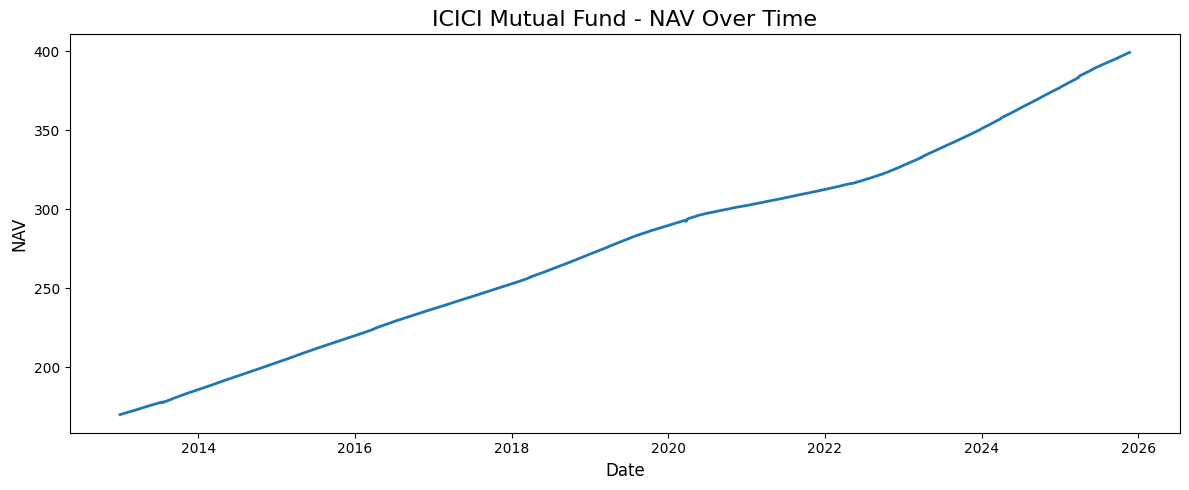

In [ ]:
plot_nav(combined_data["ICICI"], "ICICI Mutual Fund")

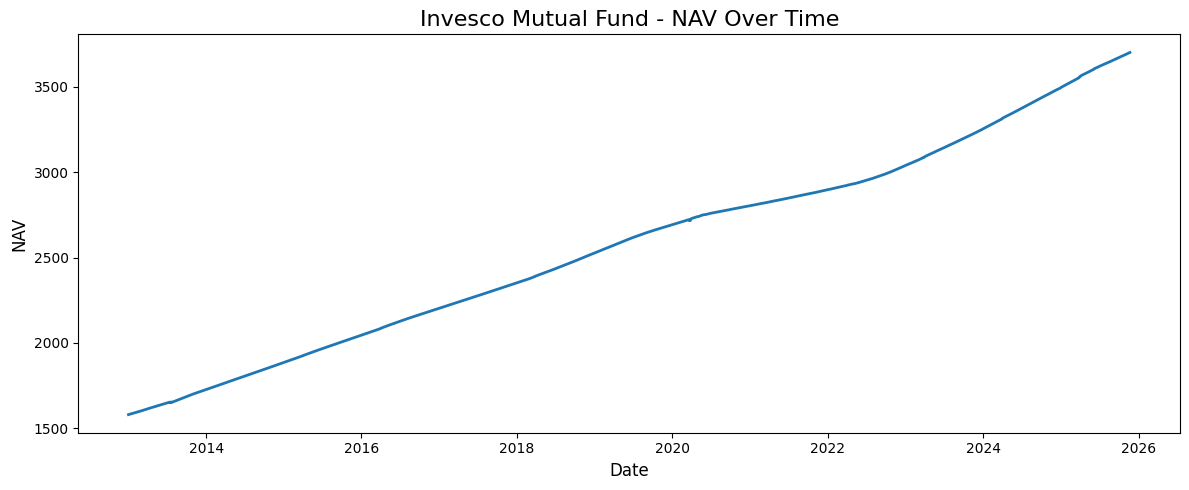

In [ ]:
plot_nav(combined_data["Invesco"], "Invesco Mutual Fund")

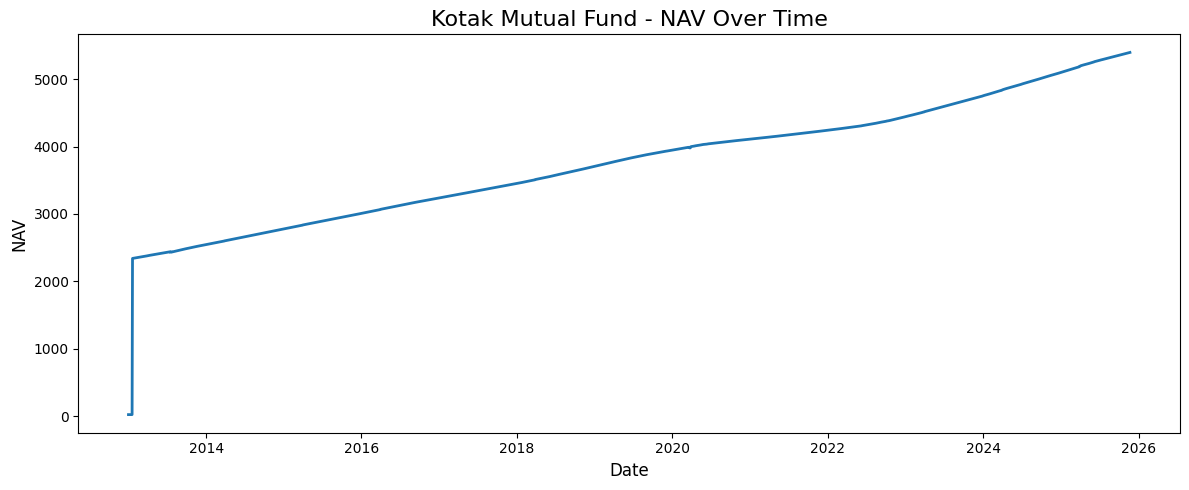

In [ ]:
plot_nav(combined_data["Kotak"], "Kotak Mutual Fund")

In [ ]:
df_kotak = combined_data["Kotak"]
df_kotak = fix_corrupted_nav(df_kotak)
df_kotak.to_csv("Kotak_final.csv", index=False)

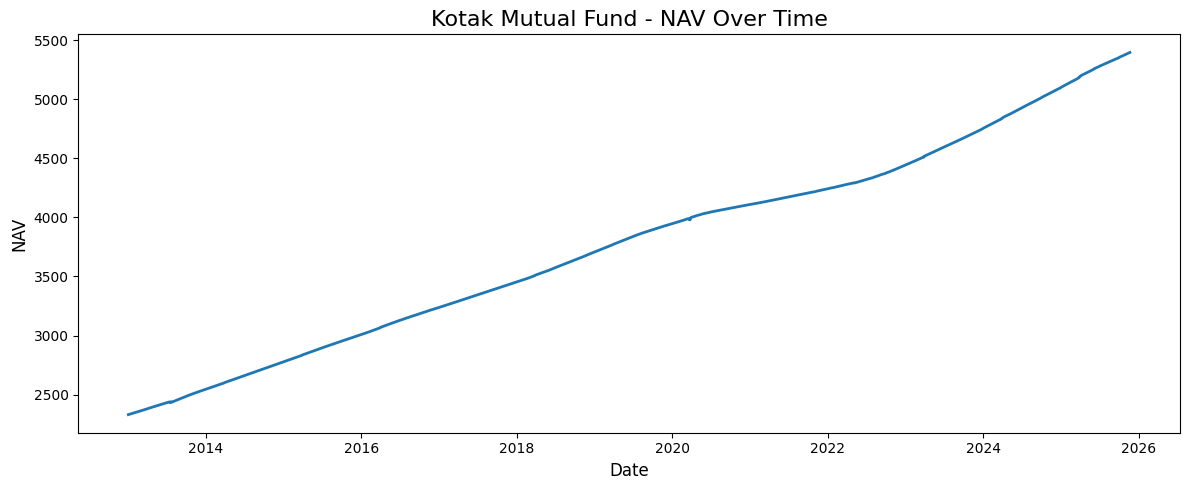

In [ ]:
plot_nav(combined_data["Kotak"], "Kotak Mutual Fund")

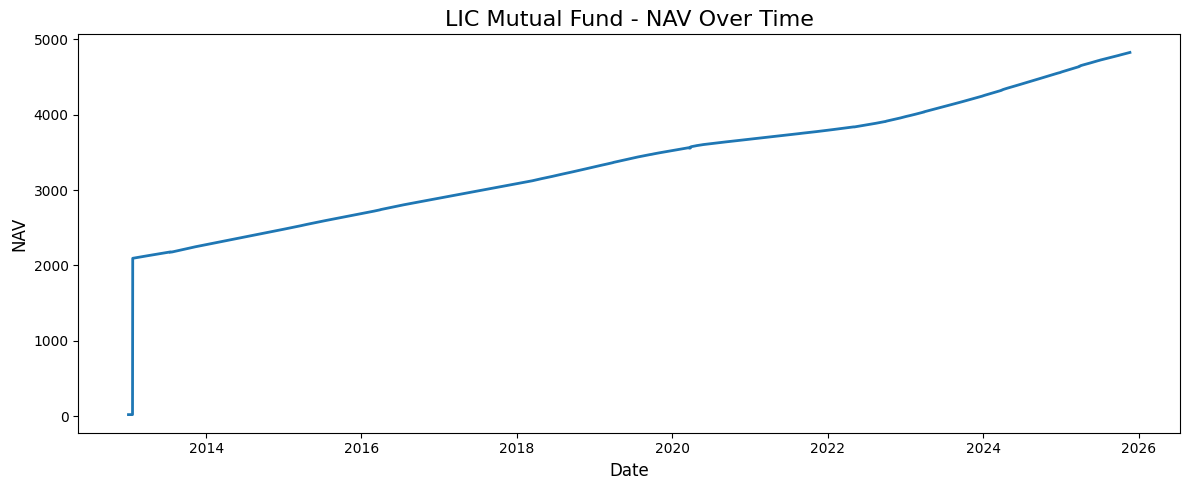

In [ ]:
plot_nav(combined_data["LIC"], "LIC Mutual Fund")

In [ ]:
df_lic = combined_data["LIC"]
df_lic = fix_corrupted_nav(df_lic)
df_lic.to_csv("LIC_final.csv", index=False)

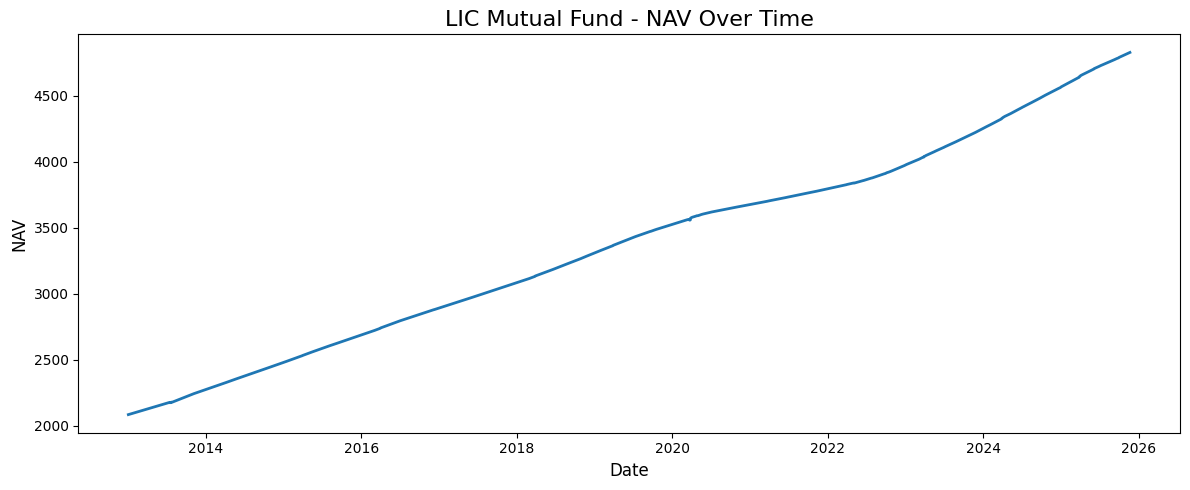

In [ ]:
plot_nav(combined_data["LIC"], "LIC Mutual Fund")

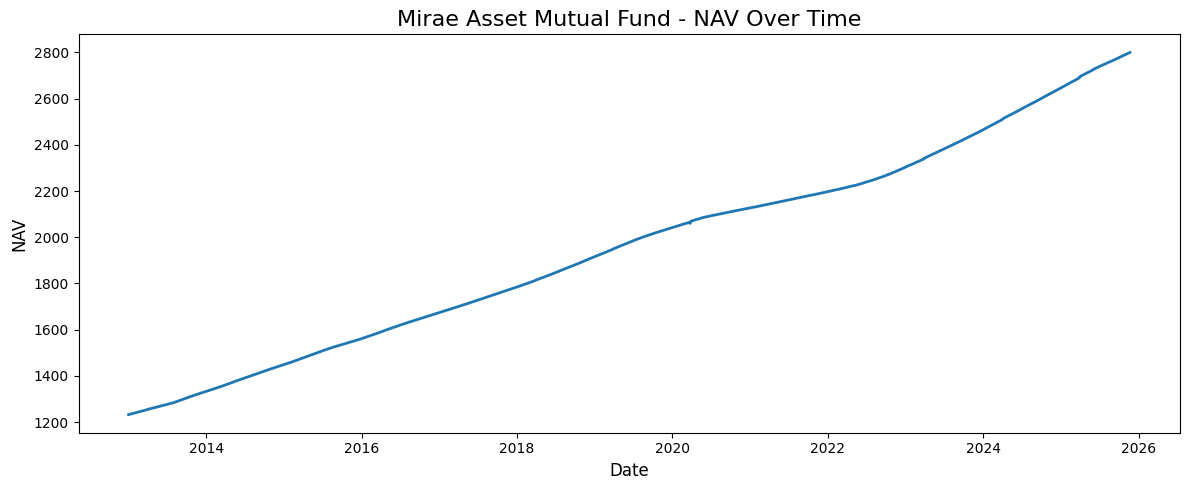

In [ ]:
plot_nav(combined_data["Mirae"], "Mirae Asset Mutual Fund")

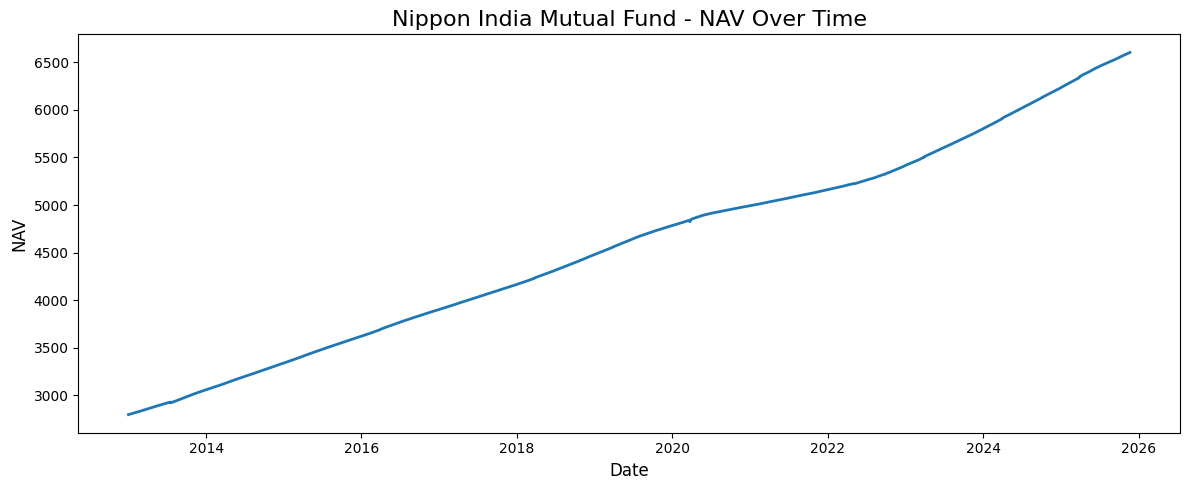

In [ ]:
plot_nav(combined_data["Nippon"], "Nippon India Mutual Fund")

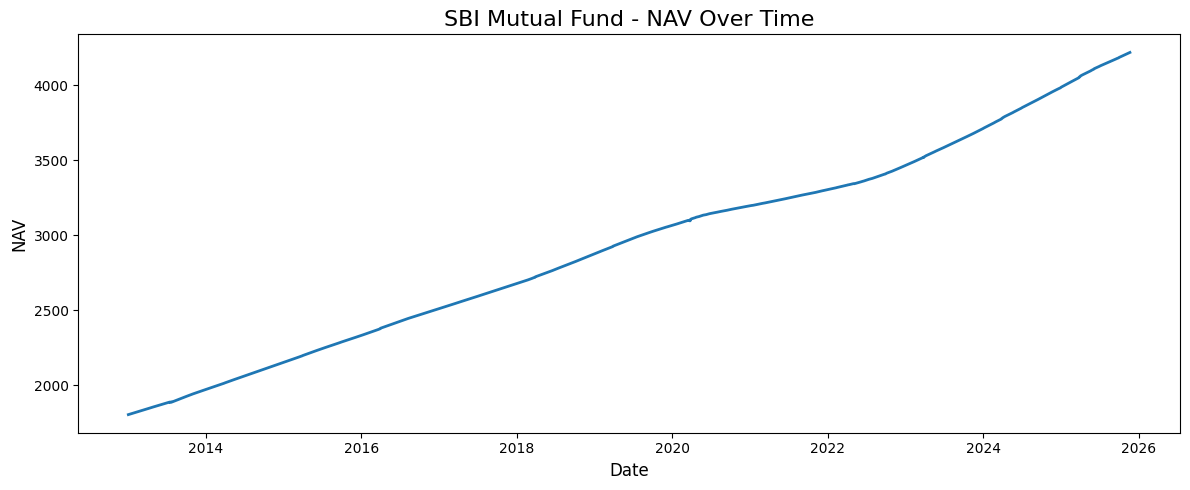

In [ ]:
plot_nav(combined_data["SBI"], "SBI Mutual Fund")

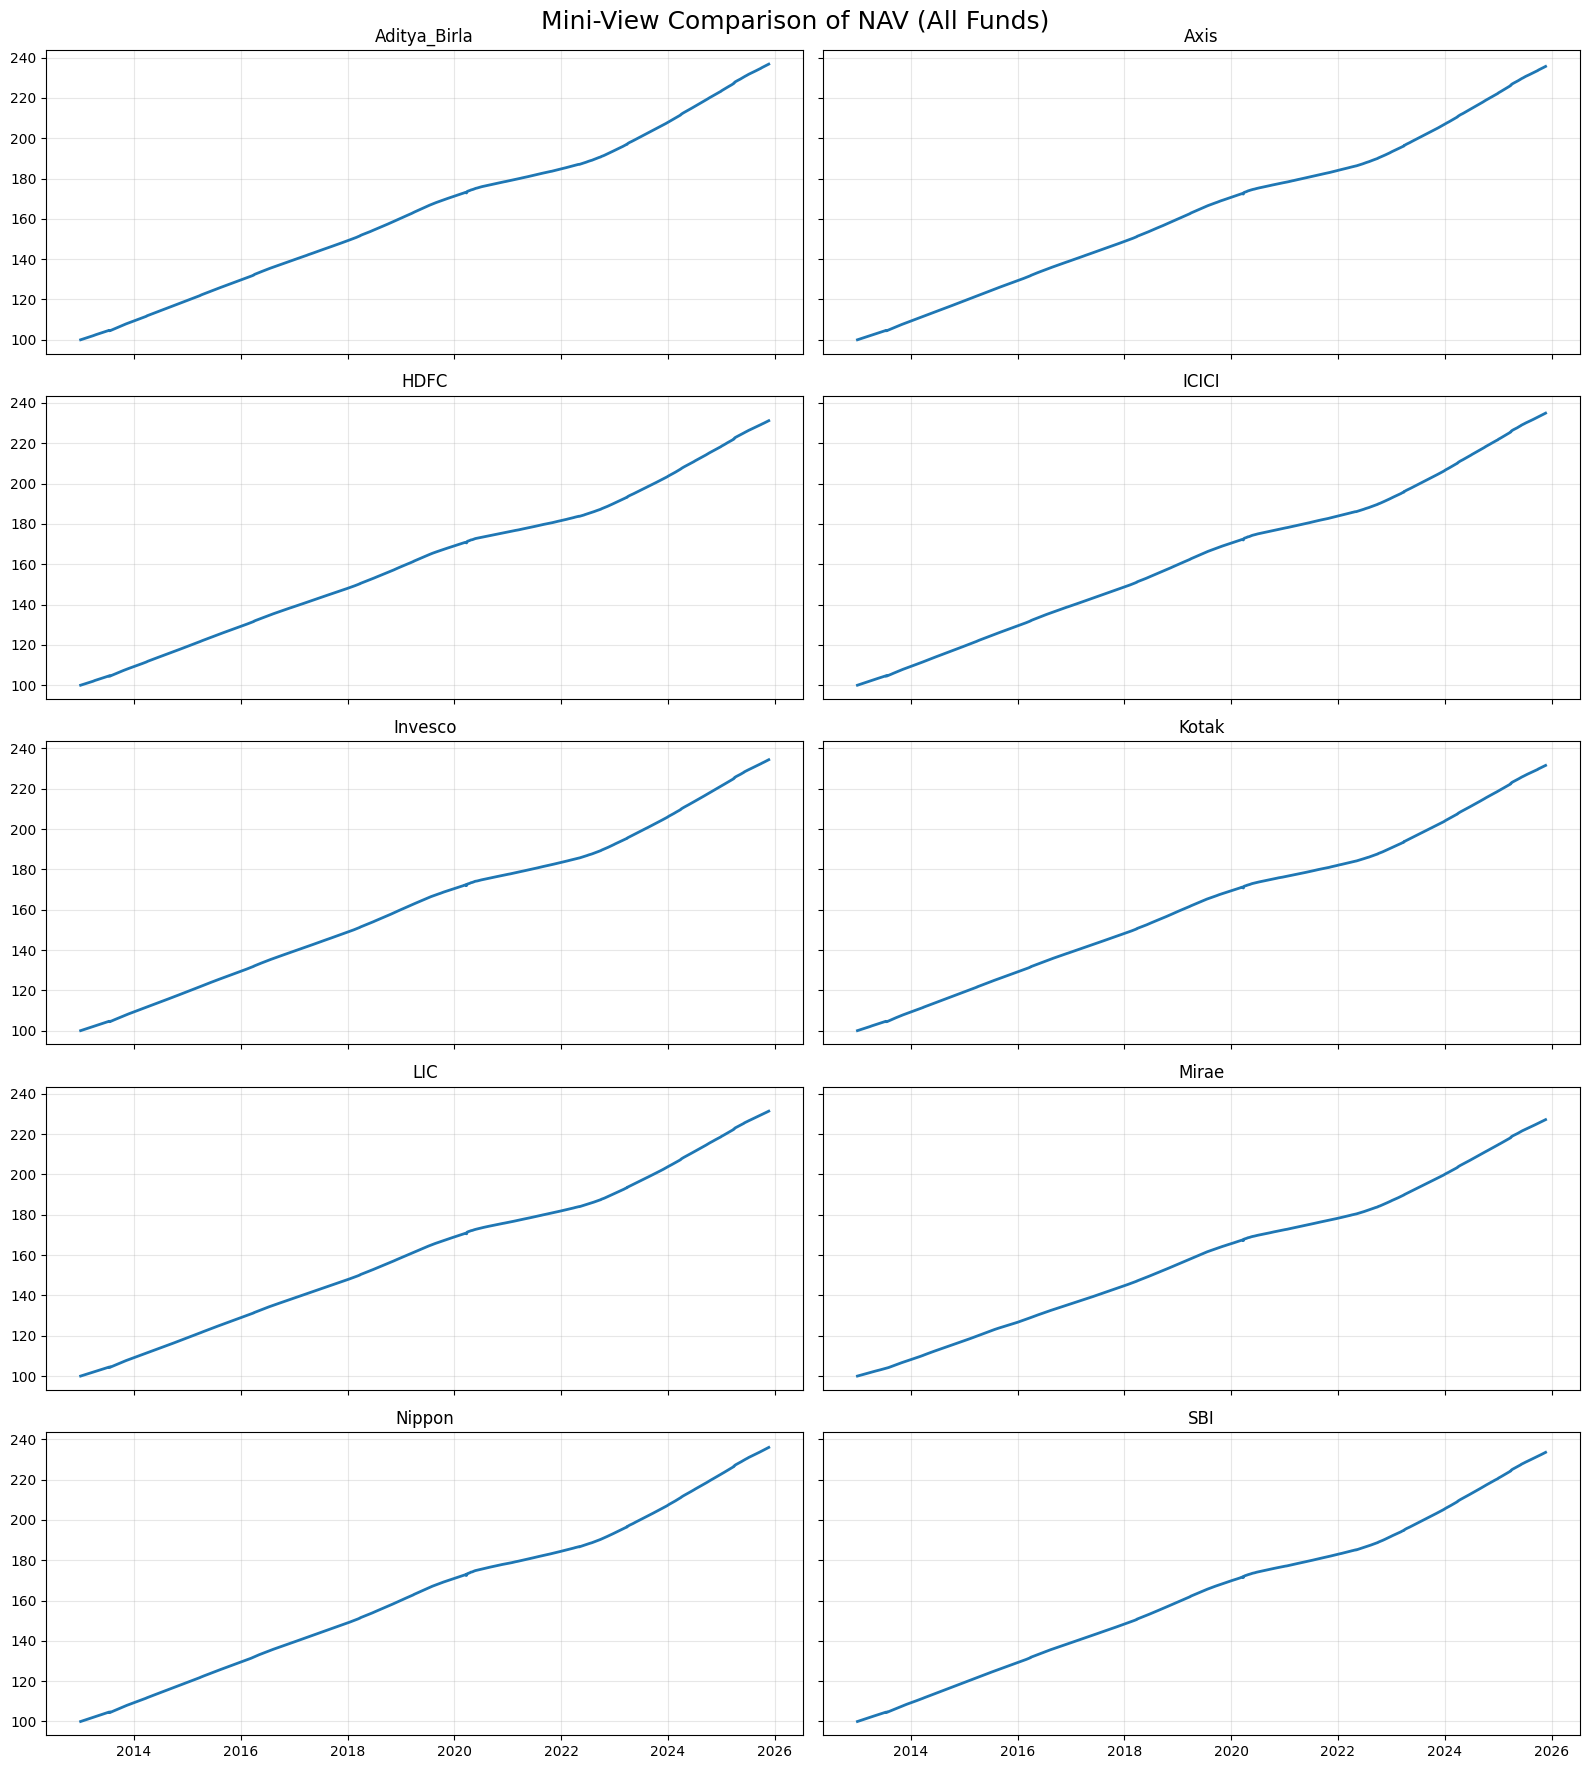

In [ ]:
fig, axes = plt.subplots(5, 2, figsize=(16,18), sharex=True, sharey=True)
axes = axes.flatten()

for ax, (fund, df) in zip(axes, combined_data.items()):
    df_plot = df.copy()
    df_plot['Norm'] = df_plot['NAV'] / df_plot['NAV'].iloc[0] * 100

    ax.plot(df_plot['Date'], df_plot['Norm'], linewidth=2)
    ax.set_title(fund)
    ax.grid(alpha=0.3)

plt.suptitle("Mini-View Comparison of NAV (All Funds)", fontsize=18)
plt.tight_layout()
plt.show()

**Observation : Mini View / Normalized NAV Comparison**

The mini view of normalized NAV shows clear variation in growth patterns across different mutual fund houses. Some funds exhibit steady and consistent upward movement, while others display noticeable short-term fluctuations. This indicates that although all funds follow a general growth trend, their volatility and rate of compounding differ significantly.

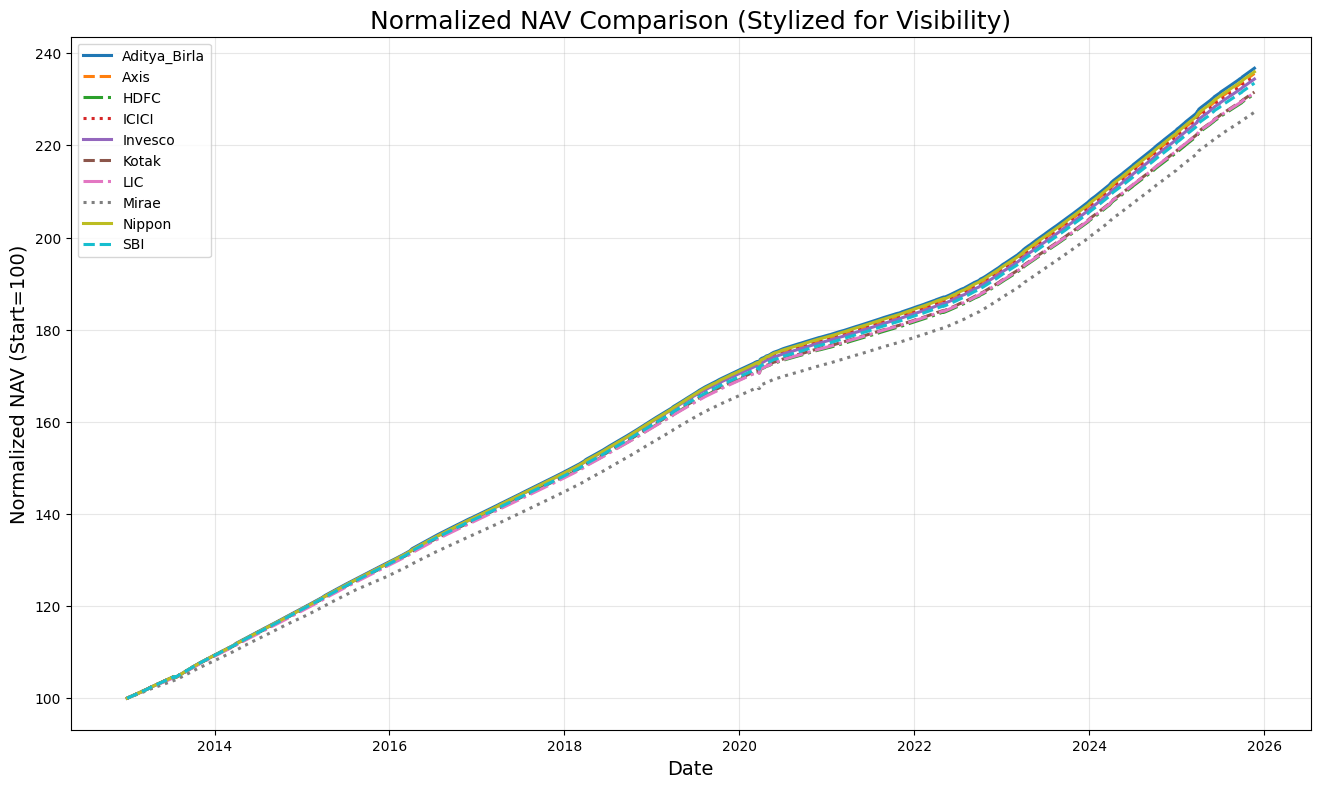

In [ ]:
plt.figure(figsize=(16,9))

line_styles = ['-', '--', '-.', ':']
colors = plt.cm.tab10(range(10))

for i, (fund, df) in enumerate(combined_data.items()):
    df_plot = df.copy()
    df_plot['Norm'] = df_plot['NAV'] / df_plot['NAV'].iloc[0] * 100

    plt.plot(
        df_plot['Date'],
        df_plot['Norm'],
        label=fund,
        linewidth=2.2,
        linestyle=line_styles[i % len(line_styles)],
        color=colors[i]
    )

plt.title("Normalized NAV Comparison (Stylized for Visibility)", fontsize=18)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Normalized NAV (Start=100)", fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

**Observation : Final Stylized Combined NAV Comparison**

The final combined NAV comparison graph highlights long-term upward trends for most funds, confirming their suitability for wealth creation over time. Funds with smoother curves indicate lower volatility and higher stability, whereas steeper or irregular curves suggest higher risk and return potential. The visual separation between fund trajectories allows easy identification of outperforming and underperforming funds.

In [ ]:
def calculate_yearly_returns(df3):
    df3 = df3.sort_values("Date").copy()
    df3["Year"] = df3["Date"].dt.year
    yearly_nav = df3.groupby("Year")["NAV"].agg(["first", "last"])
    yearly_nav["Return"] = (yearly_nav["last"] / yearly_nav["first"] - 1) * 100
    return yearly_nav["Return"]

In [ ]:
all_years = sorted(
    set().union(*[df3["Date"].dt.year.unique() for df3 in combined_data.values()])
)

yearly_table = pd.DataFrame(index=combined_data.keys(), columns=all_years)

for fund, df3 in combined_data.items():
    yearly_returns = calculate_yearly_returns(df3)

    for year, value in yearly_returns.items():
        yearly_table.loc[fund, year] = value

In [ ]:
yearly_table = yearly_table.astype(float).round(2)
yearly_table

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
Aditya_Birla,9.33,9.24,8.44,7.76,6.73,7.49,6.76,4.38,3.37,4.94,7.17,7.46,5.94
Axis,9.25,9.14,8.39,7.70,6.77,7.49,6.67,4.32,3.35,4.94,7.11,7.44,5.94
HDFC,9.25,9.08,8.33,7.57,6.49,7.21,6.50,4.09,3.20,4.76,6.93,7.30,5.79
ICICI,9.31,9.15,8.39,7.68,6.65,7.45,6.65,4.38,3.34,4.85,7.06,7.43,5.87
Invesco,9.27,9.16,8.44,7.69,6.74,7.48,6.51,4.14,3.32,4.89,7.04,7.41,5.87
Kotak,9.22,9.07,8.31,7.58,6.62,7.35,6.45,4.11,3.22,4.72,6.93,7.27,5.80
LIC,9.10,8.99,8.33,7.56,6.59,7.30,6.48,4.26,3.24,4.72,6.94,7.35,5.73
Mirae,8.14,8.65,7.75,7.20,6.59,7.33,6.55,4.17,3.29,4.81,6.99,7.32,5.79
Nippon,9.31,9.15,8.42,7.71,6.73,7.51,6.76,4.35,3.36,4.91,7.09,7.43,5.91
SBI,9.26,9.09,8.32,7.63,6.60,7.39,6.57,4.25,3.36,4.86,7.05,7.35,5.83


**Conclusion – Dataset 3**

Through NAV time series analysis, we observed how different mutual fund houses perform over long investment horizons. Trend visualizations highlighted growth consistency, volatility patterns, and relative fund stability. This form of analysis is crucial for long-term investment planning and comparative fund evaluation.

# Time Series Analysis

**Objective**

The objective of this section is to perform Time Series Analysis on the Net Asset Value (NAV) of selected mutual funds to understand long-term growth patterns, seasonality, and volatility in fund performance. Time series analysis helps in identifying historical trends that are critical for making informed investment decisions.


**Key Steps Performed**
- Loaded NAV data from multiple Excel files for different mutual fund houses.
- Converted date columns into proper datetime format.
- Handled missing values and removed inconsistent records.
- Visualized NAV trends over time using line charts.
- Compared performance trends across different fund houses.

In [ ]:
!pip install prophet

In [ ]:
prophet_data = {}

for fund, df3 in combined_data.items():
    df_temp = df3.copy()
    df_temp = df_temp.sort_values("Date")

    df_temp["ds"] = df_temp["Date"]
    df_temp["y"] = df_temp["NAV"]

    prophet_data[fund] = df_temp[["ds", "y"]]


In [ ]:
from prophet import Prophet

prophet_models = {}

for fund, df_p in prophet_data.items():
    print("Training Prophet model for:", fund)

    model = Prophet(daily_seasonality=True)
    model.fit(df_p)

    prophet_models[fund] = model

print("All Prophet models trained successfully!")


Training Prophet model for: Aditya_Birla
Training Prophet model for: Axis
Training Prophet model for: HDFC
Training Prophet model for: ICICI
Training Prophet model for: Invesco
Training Prophet model for: Kotak
Training Prophet model for: LIC
Training Prophet model for: Mirae
Training Prophet model for: Nippon
Training Prophet model for: SBI
All Prophet models trained successfully!


In [ ]:
from datetime import datetime

def predict_nav_prophet(fund_name, future_date):

    model = prophet_models[fund_name]
    last_date = prophet_data[fund_name]["ds"].max()

    future_dt = datetime.strptime(future_date, "%Y-%m-%d")

    days_ahead = (future_dt - last_date).days

    if days_ahead <= 0:
        raise ValueError("Future date must be AFTER last available NAV date.")

    future_df = model.make_future_dataframe(periods=days_ahead)

    forecast = model.predict(future_df)

    pred_value = forecast.iloc[-1]["yhat"]

    return pred_value


In [ ]:
fund_map = {
    1: "HDFC",
    2: "Axis",
    3: "SBI",
    4: "Kotak",
    5: "ICICI",
    6: "Invesco",
    7: "Nippon",
    8: "LIC",
    9: "Mirae",
    10: "Aditya_Birla"
}

In [ ]:
fund_number = int(input("Enter Mutual Fund Number (1-10): "))
future_date = input("Enter future date (YYYY-MM-DD): ")

fund_name = fund_map[fund_number]

predicted_nav = predict_nav_prophet(fund_name, future_date)

print(f"\nPredicted NAV for {fund_name} on {future_date} = {predicted_nav:.4f}")

**Conclusion – Time Series Analysis**

The time series analysis of NAV data revealed clear long-term trends and fluctuations in mutual fund performance. Consistent upward trends indicated strong long-term growth potential in certain funds, while others showed higher volatility. By visualizing NAV movements over time, we gained deeper insight into fund behavior during different market conditions. This analysis provides a strong foundation for long-term investment evaluation and risk assessment.


# Conclusion

This project successfully performed a comprehensive Exploratory Data Analysis (EDA) on multiple mutual fund datasets to understand the characteristics of liquid funds, the overall mutual fund market performance, and the long-term behavior of mutual fund NAV through Time Series Analysis.

From Dataset 1 (Liquid Mutual Funds), the analysis revealed that liquid funds are predominantly low-risk, stable, and cost-efficient investment instruments, suitable for short-term financial planning. The variation in returns and ratings across different AMCs highlighted that even within low-risk categories, fund performance differs significantly, making fund selection an important factor.


From Dataset 2 (General Mutual Fund Analysis), a strong risk–return relationship was observed, where higher-risk funds generally produced higher potential returns. The analysis also proved that AUM alone do not guarantee better performance, and the dominance of growth-oriented investment options reflects investors’ preference for long-term wealth creation.


From Dataset 3 (Time Series Analysis of NAV), the long-term NAV trends demonstrated that despite short-term market fluctuations, most mutual funds follow a consistent long-term upward growth pattern. The time series visualizations helped in identifying stable funds with low volatility and aggressive funds with high fluctuations. The comparative NAV analysis across multiple fund houses highlighted differences in compounding behavior, volatility structure, and long-term performance stability, making time series analysis a powerful tool for evaluating long-term investments.

Overall, this project proves that data-driven EDA combined with time series analysis provides strong financial insights for intelligent investment decision-making. By integrating statistical summaries, visual exploration, and long-term trend analysis, this study offers a complete understanding of mutual fund behavior and can serve as a strong foundation for future financial modeling, forecasting, and portfolio optimization.